In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt

### The data

In [29]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:]

X_train, X_val, X_test = X_train / 255, X_val / 255, X_test / 255

In [30]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [31]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)

X_train_scaled = (X_train - pixel_means) / pixel_stds
X_val_scaled = (X_val - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [32]:
def build_model(seed=42):
  tf.random.set_seed(seed)
  
  return tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, activation="softmax")
  ])


def build_and_train_model(optimizer):
  model = build_model()
  model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
  )

  return model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

In [33]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [34]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/30


2024-02-08 20:41:00.409773: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 6s 3ms/step - loss: 1.4229 - accuracy: 0.5634 - val_loss: 0.8920 - val_accuracy: 0.7260
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7826 - accuracy: 0.7423 - val_loss: 0.6828 - val_accuracy: 0.7798
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6537 - accuracy: 0.7823 - val_loss: 0.5993 - val_accuracy: 0.7962
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5914 - accuracy: 0.8003 - val_loss: 0.5571 - val_accuracy: 0.8100
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5537 - accuracy: 0.8110 - val_loss: 0.5298 - val_accuracy: 0.8160
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5280 - accuracy: 0.8185 - val_loss: 0.5175 - val_accuracy: 0.8176
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5095 - accuracy: 0.8232 - val_loss: 0.4965 - val_accuracy: 0.8232
Epo

### Momentum

In [35]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [36]:
his_momentum = build_and_train_model(optimizer)

Epoch 1/30


2024-02-08 20:43:43.675040: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 6s 3ms/step - loss: 0.7107 - accuracy: 0.7624 - val_loss: 0.5001 - val_accuracy: 0.8230
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4658 - accuracy: 0.8371 - val_loss: 0.4482 - val_accuracy: 0.8354
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4203 - accuracy: 0.8521 - val_loss: 0.4160 - val_accuracy: 0.8528
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3933 - accuracy: 0.8623 - val_loss: 0.3847 - val_accuracy: 0.8586
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3723 - accuracy: 0.8687 - val_loss: 0.3711 - val_accuracy: 0.8632
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3586 - accuracy: 0.8725 - val_loss: 0.3677 - val_accuracy: 0.8674
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3415 - accuracy: 0.8784 - val_loss: 0.3621 - val_accuracy: 0.8658
Epo

### Nesterov Accelarated Gradient

In [38]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                  nesterov=True)

In [39]:
his_neg = build_and_train_model(optimizer)

Epoch 1/30


2024-02-08 20:59:03.412180: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 7s 4ms/step - loss: 0.6983 - accuracy: 0.7652 - val_loss: 0.5030 - val_accuracy: 0.8232
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4596 - accuracy: 0.8401 - val_loss: 0.4384 - val_accuracy: 0.8440
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4171 - accuracy: 0.8532 - val_loss: 0.4084 - val_accuracy: 0.8584
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3924 - accuracy: 0.8623 - val_loss: 0.3842 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3714 - accuracy: 0.8687 - val_loss: 0.3756 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3585 - accuracy: 0.8724 - val_loss: 0.3879 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3439 - accuracy: 0.8769 - val_loss: 0.3893 - val_accuracy: 0.8616
Epo

### AdaGrad

In [41]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [42]:
his_adagrad = build_and_train_model(optimizer)

Epoch 1/30


2024-02-08 21:09:06.931192: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 7s 4ms/step - loss: 1.0274 - accuracy: 0.6549 - val_loss: 0.7149 - val_accuracy: 0.7490
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6709 - accuracy: 0.7664 - val_loss: 0.6054 - val_accuracy: 0.7868
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5928 - accuracy: 0.7973 - val_loss: 0.5530 - val_accuracy: 0.8084
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5497 - accuracy: 0.8133 - val_loss: 0.5228 - val_accuracy: 0.8216
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5214 - accuracy: 0.8225 - val_loss: 0.5010 - val_accuracy: 0.8284
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5014 - accuracy: 0.8289 - val_loss: 0.4872 - val_accuracy: 0.8310
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4866 - accuracy: 0.8336 - val_loss: 0.4744 - val_accuracy: 0.8364
Epo

### RMSProp

In [43]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [44]:
his_rmsprop = build_and_train_model(optimizer)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5146 - accuracy: 0.8139 - val_loss: 0.4658 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3944 - accuracy: 0.8573 - val_loss: 0.4411 - val_accuracy: 0.8372
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3697 - accuracy: 0.8682 - val_loss: 0.4271 - val_accuracy: 0.8638
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3615 - accuracy: 0.8734 - val_loss: 0.4180 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3548 - accuracy: 0.8760 - val_loss: 0.3641 - val_accuracy: 0.8696
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3466 - accuracy: 0.8796 - val_loss: 0.4619 - val_accuracy: 0.8580
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3495 - accuracy: 0.8797 - val_loss: 0.4596 - val_accuracy:

### Adam

In [45]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                    beta_2=0.999)

In [46]:
his_adam = build_and_train_model(optimizer)

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4960 - accuracy: 0.8221 - val_loss: 0.4212 - val_accuracy: 0.8364
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3764 - accuracy: 0.8620 - val_loss: 0.4247 - val_accuracy: 0.8366
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3418 - accuracy: 0.8745 - val_loss: 0.3776 - val_accuracy: 0.8628
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3165 - accuracy: 0.8834 - val_loss: 0.3349 - val_accuracy: 0.8754
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2970 - accuracy: 0.8894 - val_loss: 0.3339 - val_accuracy: 0.8738
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2848 - accuracy: 0.8946 - val_loss: 0.3361 - val_accuracy: 0.8752
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2702 - accuracy: 0.8973 - val_loss: 0.3409 - val_accuracy:

### AdaMax

In [47]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9,
                                      beta_2=0.999)

In [48]:
his_adamax = build_and_train_model(optimizer)

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5307 - accuracy: 0.8164 - val_loss: 0.4419 - val_accuracy: 0.8402
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3956 - accuracy: 0.8581 - val_loss: 0.3992 - val_accuracy: 0.8514
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3608 - accuracy: 0.8708 - val_loss: 0.3748 - val_accuracy: 0.8678
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3354 - accuracy: 0.8792 - val_loss: 0.3481 - val_accuracy: 0.8698
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3154 - accuracy: 0.8858 - val_loss: 0.3343 - val_accuracy: 0.8772
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3019 - accuracy: 0.8897 - val_loss: 0.3505 - val_accuracy: 0.8766
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2893 - accuracy: 0.8931 - val_loss: 0.3378 - val_accuracy:

### Nadam

In [49]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)

In [50]:
his_nadam = build_and_train_model(optimizer)

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.4810 - accuracy: 0.8299 - val_loss: 0.3971 - val_accuracy: 0.8516
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3654 - accuracy: 0.8676 - val_loss: 0.3634 - val_accuracy: 0.8656
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3313 - accuracy: 0.8787 - val_loss: 0.3529 - val_accuracy: 0.8758
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3108 - accuracy: 0.8872 - val_loss: 0.3288 - val_accuracy: 0.8822
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2933 - accuracy: 0.8908 - val_loss: 0.3385 - val_accuracy: 0.8750
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2800 - accuracy: 0.8960 - val_loss: 0.3565 - val_accuracy: 0.8778
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2671 - accuracy: 0.8993 - val_loss: 0.3293 - val_accuracy:

### AdamW

In [51]:
optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-5, learning_rate=0.001,
                                     beta_1=0.9, beta_2=0.999)

In [52]:
his_adamw = build_and_train_model(optimizer)

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.5022 - accuracy: 0.8200 - val_loss: 0.4464 - val_accuracy: 0.8242
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3759 - accuracy: 0.8631 - val_loss: 0.3837 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3407 - accuracy: 0.8748 - val_loss: 0.3477 - val_accuracy: 0.8756
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3164 - accuracy: 0.8830 - val_loss: 0.3482 - val_accuracy: 0.8746
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2980 - accuracy: 0.8901 - val_loss: 0.3401 - val_accuracy: 0.8770
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2850 - accuracy: 0.8946 - val_loss: 0.3430 - val_accuracy: 0.8800
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2713 - accuracy: 0.8985 - val_loss: 0.3452 - val_accuracy:

### Comparison between optimizer

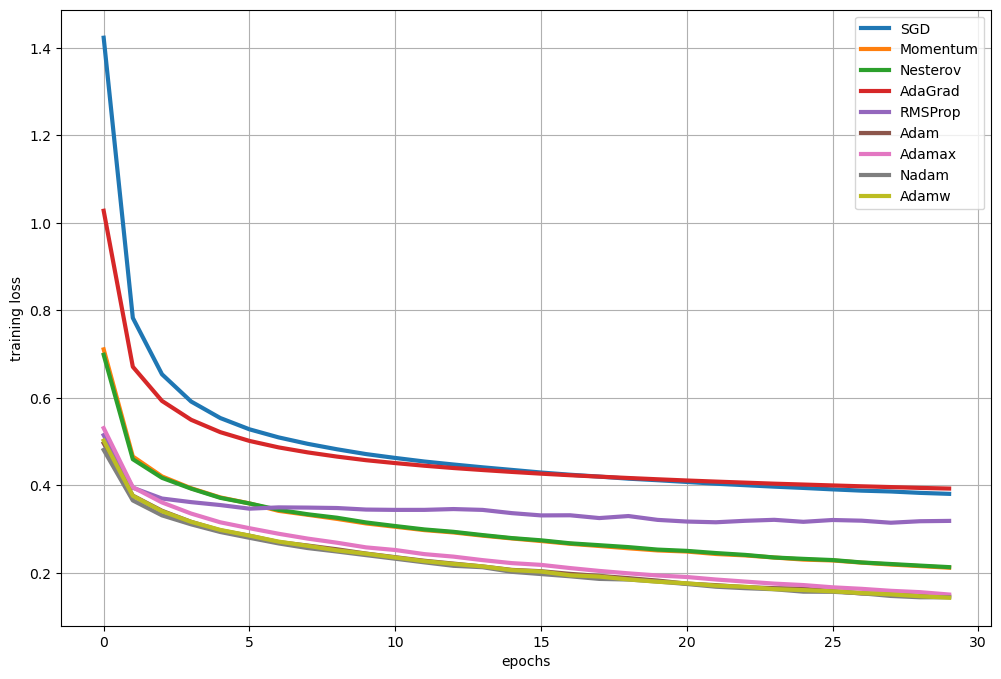

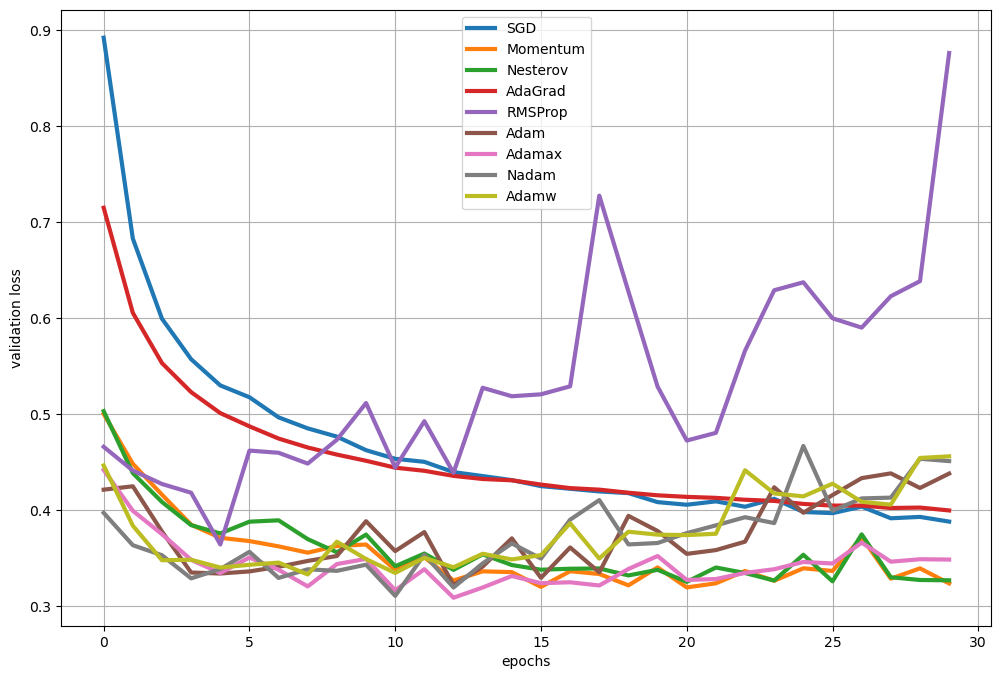

In [56]:
for loss in ("loss", "val_loss"):
  plt.figure(figsize=(12, 8))
  opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam Adamw"
  for his, name in zip((history_sgd, his_momentum, his_neg, his_adagrad,
                       his_rmsprop, his_adam, his_adamax, his_nadam,
                       his_adamw), opt_names.split()):
    plt.plot(his.history[loss], label=f"{name}", linewidth=3)

  plt.grid()
  plt.xlabel("epochs")
  plt.ylabel({"loss": "training loss", "val_loss": "validation loss"}[loss])
  plt.legend()